# Unsupervised Machine Learning: Clustering

## This script contains:
### 1. Importing libraries and data
### 2. Cleaning and preparing data
### 3. The elbow technique
### 4. K-means clustering
### 5. Exporting data

### 01. Importing libraries and data

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# ensure graphs are displayed in the notebook automatically

%matplotlib inline

In [3]:
# define path

path = '/Users/mariasampogna/Documents/Career Foundry/Data Analytics Immersion/Achievement 6/EPA Air Quality Analysis'

In [4]:
# import data

df = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','EPA Daily Data with AQI Categories.pkl'))

In [5]:
df.shape

(472410, 61)

In [6]:
df.head()

,Unnamed: 0,Site Num,Latitude,Longitude,Sample Duration Ozone,Pollutant Standard Ozone,Date Local,Units of Measure Ozone,Event Type Ozone,Observation Count Ozone,...,Observation Count SO2,Observation Percent SO2,Arithmetic Mean SO2,1st Max Value SO2,1st Max Hour SO2,AQI SO2,Method Code SO2,Method Name SO2,_merge,AQI Level Ozone
0,0,10.0,30.497478,-87.880258,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2022-02-28,Parts per million,None,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,Good
1,1,10.0,30.497478,-87.880258,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2022-03-01,Parts per million,None,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,Good
2,2,10.0,30.497478,-87.880258,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2022-03-02,Parts per million,None,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,Moderate
3,3,10.0,30.497478,-87.880258,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2022-03-03,Parts per million,None,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,Good
4,4,10.0,30.497478,-87.880258,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2022-03-04,Parts per million,None,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,Moderate


### 02. Data cleaning and preparation

In [7]:
# review current columns

df.columns

Index(['Unnamed: 0', 'Site Num', 'Latitude', 'Longitude',
       'Sample Duration Ozone', 'Pollutant Standard Ozone', 'Date Local',
       'Units of Measure Ozone', 'Event Type Ozone', 'Observation Count Ozone',
       'Observation Percent Ozone', 'Arithmetic Mean Ozone',
       '1st Max Value Ozone', '1st Max Hour Ozone', 'AQI Ozone',
       'Method Code Ozone', 'Method Name Ozone', 'Local Site Name', 'Address',
       'State Name', 'County Name', 'City Name', 'CBSA Name',
       'Sample Duration CO', 'Pollutant Standard CO', 'Units of Measure CO',
       'Event Type CO', 'Observation Count CO', 'Observation Percent CO',
       'Arithmetic Mean CO', '1st Max Value CO', '1st Max Hour CO', 'AQI CO',
       'Method Code CO', 'Method Name CO', 'Sample Duration NO2',
       'Pollutant Standard NO2', 'Units of Measure NO2', 'Event Type NO2',
       'Observation Count NO2', 'Observation Percent NO2',
       'Arithmetic Mean NO2', '1st Max Value NO2', '1st Max Hour NO2',
       'AQI NO2', 'Me

In [8]:
# create list of only numerical columns

columns = ['Latitude',
          'Longitude',
          'Arithmetic Mean Ozone',
          '1st Max Value Ozone',
          'AQI Ozone',
          'Arithmetic Mean CO',
          '1st Max Value CO',
          'AQI CO',
          'Arithmetic Mean NO2',
          '1st Max Value NO2',
          'AQI NO2',
          'Arithmetic Mean SO2',
          '1st Max Value SO2',
          'AQI SO2']

In [9]:
# create dataframe with only numerical columns

df_sub = df[columns]

In [10]:
df_sub.shape

(472410, 14)

In [11]:
df_sub.head()

,Latitude,Longitude,Arithmetic Mean Ozone,1st Max Value Ozone,AQI Ozone,Arithmetic Mean CO,1st Max Value CO,AQI CO,Arithmetic Mean NO2,1st Max Value NO2,AQI NO2,Arithmetic Mean SO2,1st Max Value SO2,AQI SO2
0,30.497478,-87.880258,0.038000,0.038,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30.497478,-87.880258,0.037235,0.054,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30.497478,-87.880258,0.038235,0.055,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30.497478,-87.880258,0.024333,0.043,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30.497478,-87.880258,0.049647,0.063,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# check null value counts

df_sub.isnull().sum()

Latitude                      0
Longitude                     0
Arithmetic Mean Ozone    130909
1st Max Value Ozone      130909
AQI Ozone                130909
Arithmetic Mean CO       311781
1st Max Value CO         311781
AQI CO                   392076
Arithmetic Mean NO2      280482
1st Max Value NO2        280482
AQI NO2                  280482
Arithmetic Mean SO2      231359
1st Max Value SO2        231359
AQI SO2                  351787
dtype: int64

In [13]:
# drop Ozone Mean null values from data

df_sub = df_sub.dropna(subset=['Arithmetic Mean Ozone'])

In [14]:
# recheck null values

df_sub.isnull().sum()

Latitude                      0
Longitude                     0
Arithmetic Mean Ozone         0
1st Max Value Ozone           0
AQI Ozone                     0
Arithmetic Mean CO       225972
1st Max Value CO         225972
AQI CO                   283824
Arithmetic Mean NO2      200902
1st Max Value NO2        200902
AQI NO2                  200902
Arithmetic Mean SO2      198676
1st Max Value SO2        198676
AQI SO2                  270040
dtype: int64

In [15]:
# drop CO Mean null values from data

df_sub = df_sub.dropna(subset=['Arithmetic Mean CO'])

In [16]:
# recheck null values

df_sub.isnull().sum()

Latitude                     0
Longitude                    0
Arithmetic Mean Ozone        0
1st Max Value Ozone          0
AQI Ozone                    0
Arithmetic Mean CO           0
1st Max Value CO             0
AQI CO                   57852
Arithmetic Mean NO2      30844
1st Max Value NO2        30844
AQI NO2                  30844
Arithmetic Mean SO2      22071
1st Max Value SO2        22071
AQI SO2                  68764
dtype: int64

In [17]:
# drop NO2 Mean null values from data

df_sub = df_sub.dropna(subset=['Arithmetic Mean NO2'])

In [18]:
# recheck null values

df_sub.isnull().sum()

Latitude                     0
Longitude                    0
Arithmetic Mean Ozone        0
1st Max Value Ozone          0
AQI Ozone                    0
Arithmetic Mean CO           0
1st Max Value CO             0
AQI CO                   42421
Arithmetic Mean NO2          0
1st Max Value NO2            0
AQI NO2                      0
Arithmetic Mean SO2      16569
1st Max Value SO2        16569
AQI SO2                  50599
dtype: int64

In [19]:
# drop SO2 Mean null values from data

df_sub = df_sub.dropna(subset=['Arithmetic Mean SO2'])

In [20]:
# recheck null values

df_sub.isnull().sum()

Latitude                     0
Longitude                    0
Arithmetic Mean Ozone        0
1st Max Value Ozone          0
AQI Ozone                    0
Arithmetic Mean CO           0
1st Max Value CO             0
AQI CO                   34133
Arithmetic Mean NO2          0
1st Max Value NO2            0
AQI NO2                      0
Arithmetic Mean SO2          0
1st Max Value SO2            0
AQI SO2                  34030
dtype: int64

In [21]:
# drop SO2 and CO Mean AQI values from data

df_sub = df_sub.dropna(subset=['AQI CO','AQI SO2'])

In [22]:
# recheck null values

df_sub.isnull().sum()

Latitude                 0
Longitude                0
Arithmetic Mean Ozone    0
1st Max Value Ozone      0
AQI Ozone                0
Arithmetic Mean CO       0
1st Max Value CO         0
AQI CO                   0
Arithmetic Mean NO2      0
1st Max Value NO2        0
AQI NO2                  0
Arithmetic Mean SO2      0
1st Max Value SO2        0
AQI SO2                  0
dtype: int64

In [23]:
# check for duplicates

dups = df_sub.duplicated()

In [24]:
dups.shape

(17005,)

In [25]:
df_sub.shape

(17005, 14)

### 03. The elbow technique

In [26]:
# define range of potential clusters in data and k-means clusters in the range assigned

num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [27]:
# create a score for the rate of variation for the given cluster option

score = [kmeans[i].fit(df_sub).score(df_sub) for i in range(len(kmeans))]

score

/Users/mariasampogna/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mariasampogna/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mariasampogna/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mariasampogna/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

[-19137363.607636195,
 -13465356.62648864,
 -10234039.553915426,
 -7611555.288860792,
 -6405515.3389725,
 -5618843.627925984,
 -5272454.913703281,
 -4633051.041652599,
 -4294870.98593998]

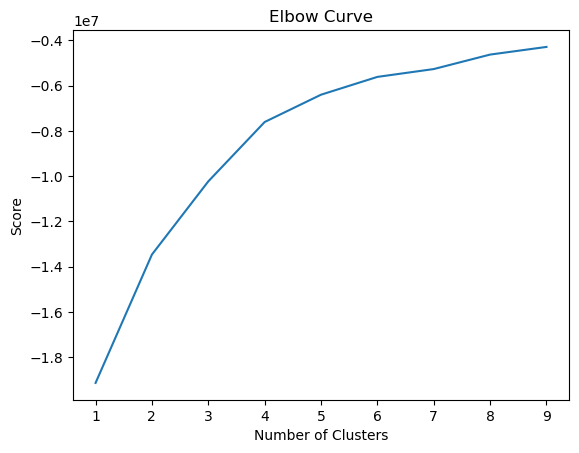

In [28]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### Discussion

For the k-means algorithm, I will use 4 clusters. The elbow curve begins to flatten out a bit after 4 clusters, so this seems like the optimal number to use. The elbow is not very pronounced, however, I don't want to use too many clusters and make analysis difficult. 4 seems like the optimal number based on this chart.

### 04. K-means clustering

In [29]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [30]:
# Fit the k-means object to the data.

kmeans.fit(df_sub)

/Users/mariasampogna/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [31]:
df_sub['clusters'] = kmeans.fit_predict(df_sub)

/Users/mariasampogna/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [32]:
df_sub.head()

,Latitude,Longitude,Arithmetic Mean Ozone,1st Max Value Ozone,AQI Ozone,Arithmetic Mean CO,1st Max Value CO,AQI CO,Arithmetic Mean NO2,1st Max Value NO2,AQI NO2,Arithmetic Mean SO2,1st Max Value SO2,AQI SO2,clusters
608,33.553056,-86.815,0.024765,0.026,24.0,0.100000,0.1,1.0,1.308333,1.9,1.0,-0.191667,-0.1,0.0,2
612,33.553056,-86.815,0.017824,0.025,23.0,0.133333,0.2,2.0,1.954167,4.2,4.0,-0.237500,-0.2,0.0,2
616,33.553056,-86.815,0.025353,0.030,28.0,0.200000,0.2,2.0,5.455556,8.1,8.0,0.555556,1.9,1.0,2
620,33.553056,-86.815,0.012563,0.034,31.0,0.366667,0.5,6.0,16.493750,29.4,27.0,0.550000,1.9,1.0,1
624,33.553056,-86.815,0.023941,0.028,26.0,0.366667,0.6,7.0,9.204167,19.8,18.0,0.654167,2.4,3.0,2


In [33]:
df_sub['clusters'].value_counts()

2    7030
3    4731
1    4006
0    1238
Name: clusters, dtype: int64

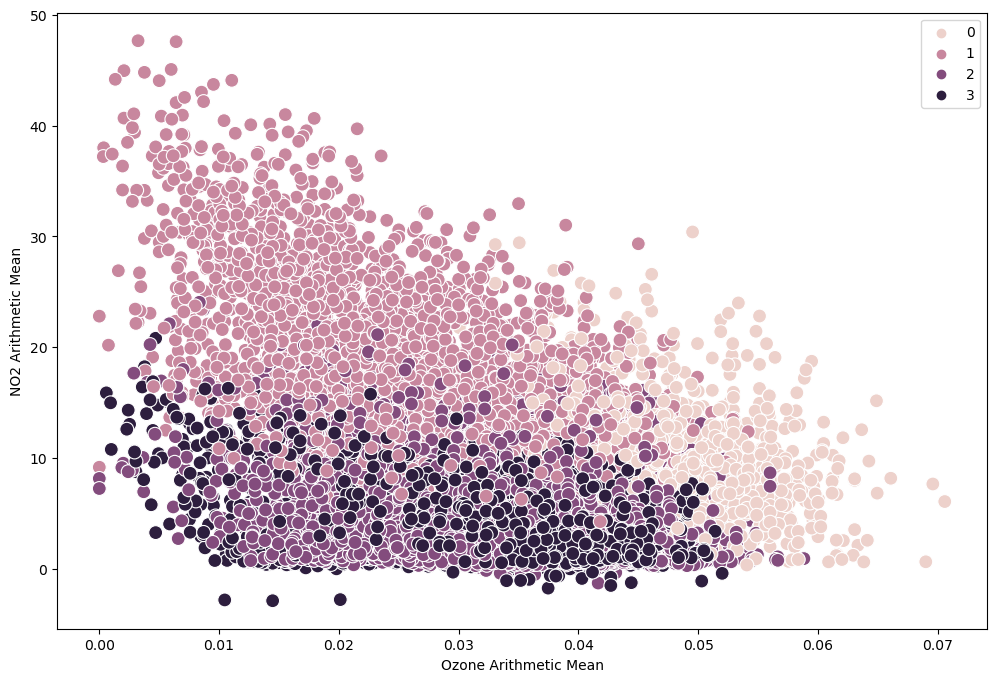

In [34]:
# Plot the clusters for the "Arithmetic Mean Ozone" and "Arithmetic Mean NO2" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['Arithmetic Mean Ozone'], y=df_sub['Arithmetic Mean NO2'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Ozone Arithmetic Mean') # Label x-axis.
plt.ylabel('NO2 Arithmetic Mean') # Label y-axis.
plt.show()

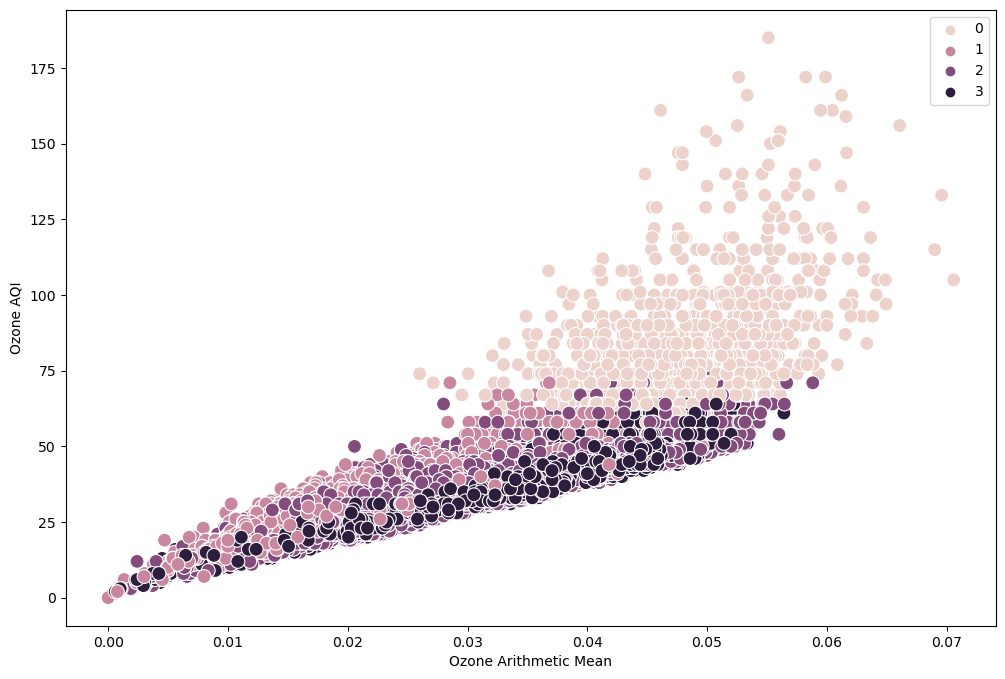

In [35]:
# Plot the clusters for the "Arithmetic Mean Ozone" and "AQI Ozone" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['Arithmetic Mean Ozone'], y=df_sub['AQI Ozone'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Ozone Arithmetic Mean') # Label x-axis.
plt.ylabel('Ozone AQI') # Label y-axis.
plt.show()

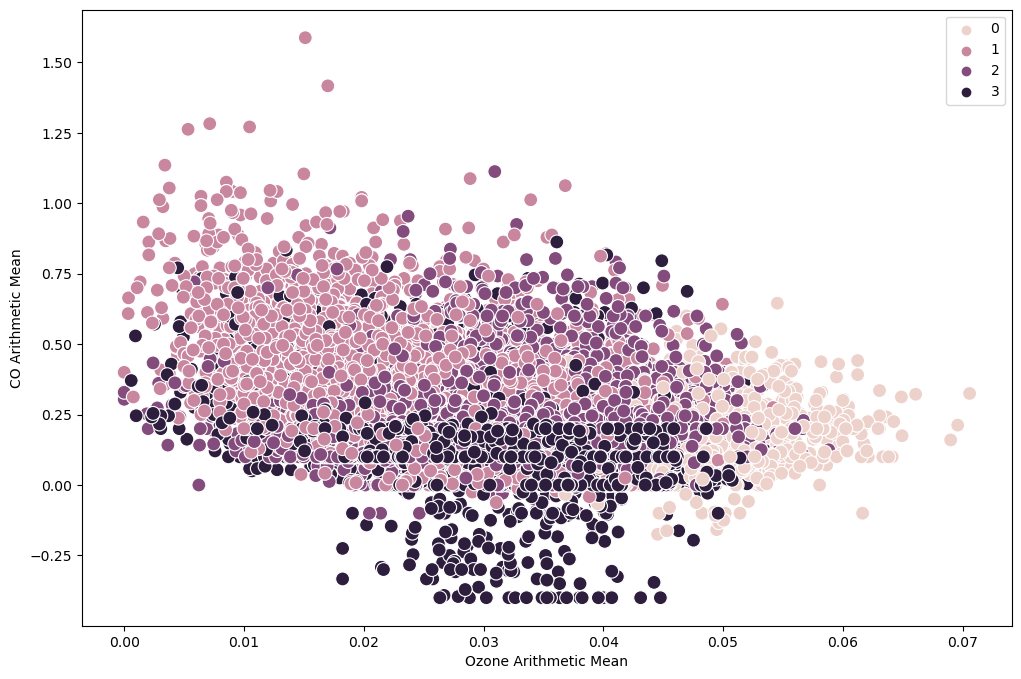

In [36]:
# Plot the clusters for the "Arithmetic Mean Ozone" and "Arithmetic Mean CO" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['Arithmetic Mean Ozone'], y=df_sub['Arithmetic Mean CO'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Ozone Arithmetic Mean') # Label x-axis.
plt.ylabel('CO Arithmetic Mean') # Label y-axis.
plt.show()

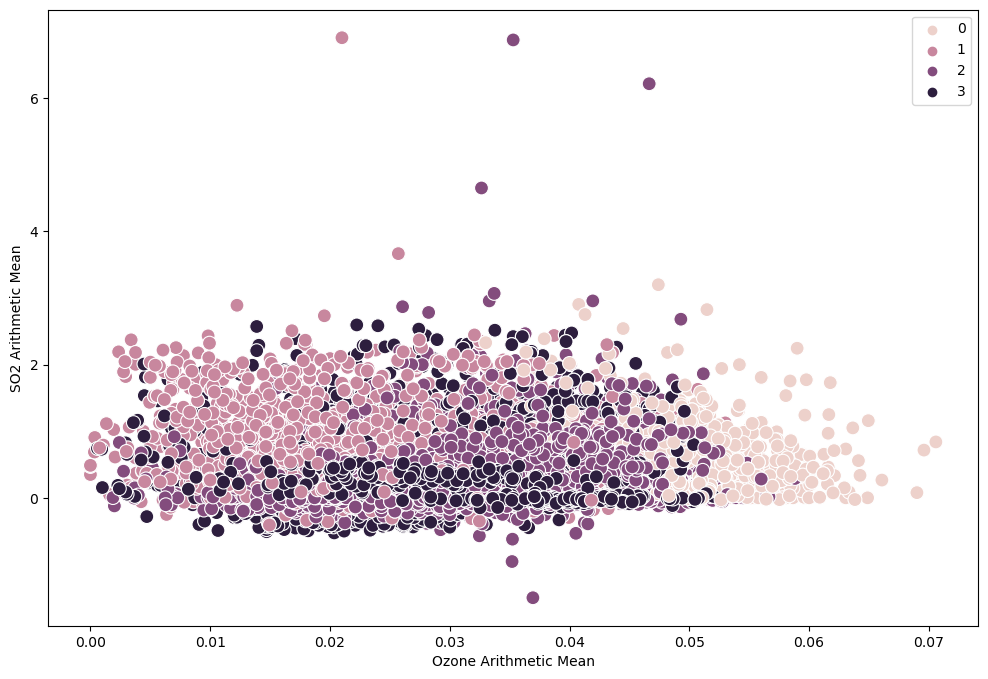

In [37]:
# Plot the clusters for the "Arithmetic Mean Ozone" and "Arithmetic Mean SO2" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['Arithmetic Mean Ozone'], y=df_sub['Arithmetic Mean SO2'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Ozone Arithmetic Mean') # Label x-axis.
plt.ylabel('SO2 Arithmetic Mean') # Label y-axis.
plt.show()

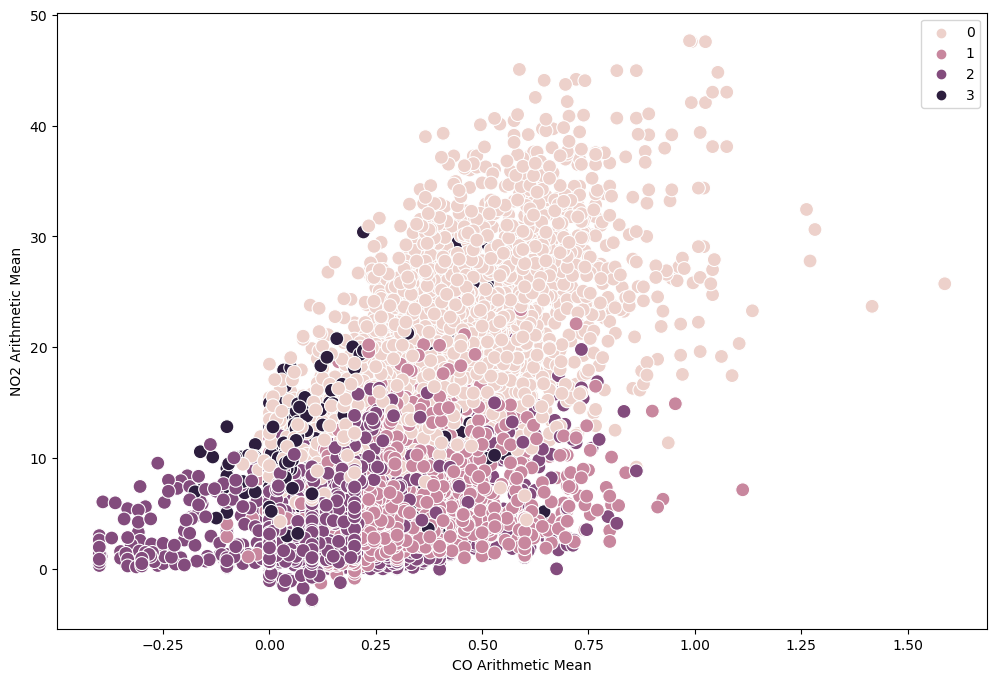

In [49]:
# Plot the clusters for the "Arithmetic Mean CO" and "Arithmetic Mean NO2" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['Arithmetic Mean CO'], y=df_sub['Arithmetic Mean NO2'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('CO Arithmetic Mean') # Label x-axis.
plt.ylabel('NO2 Arithmetic Mean') # Label y-axis.
plt.show()

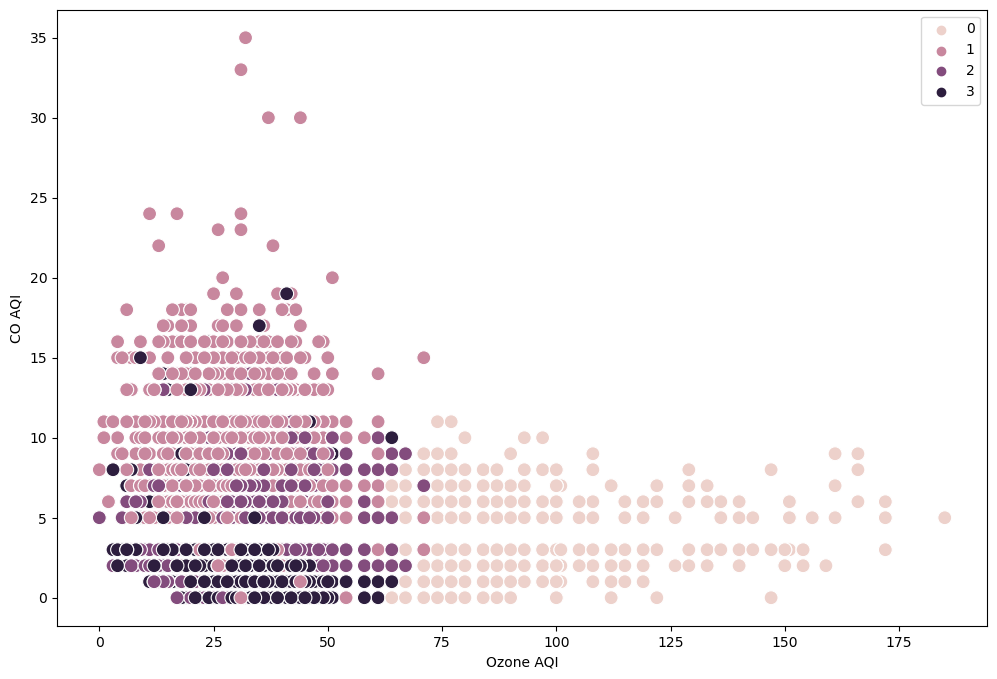

In [38]:
# Plot the clusters for the "AQI Ozone" and "AQI Co" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['AQI Ozone'], y=df_sub['AQI CO'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Ozone AQI') # Label x-axis.
plt.ylabel('CO AQI') # Label y-axis.
plt.show()

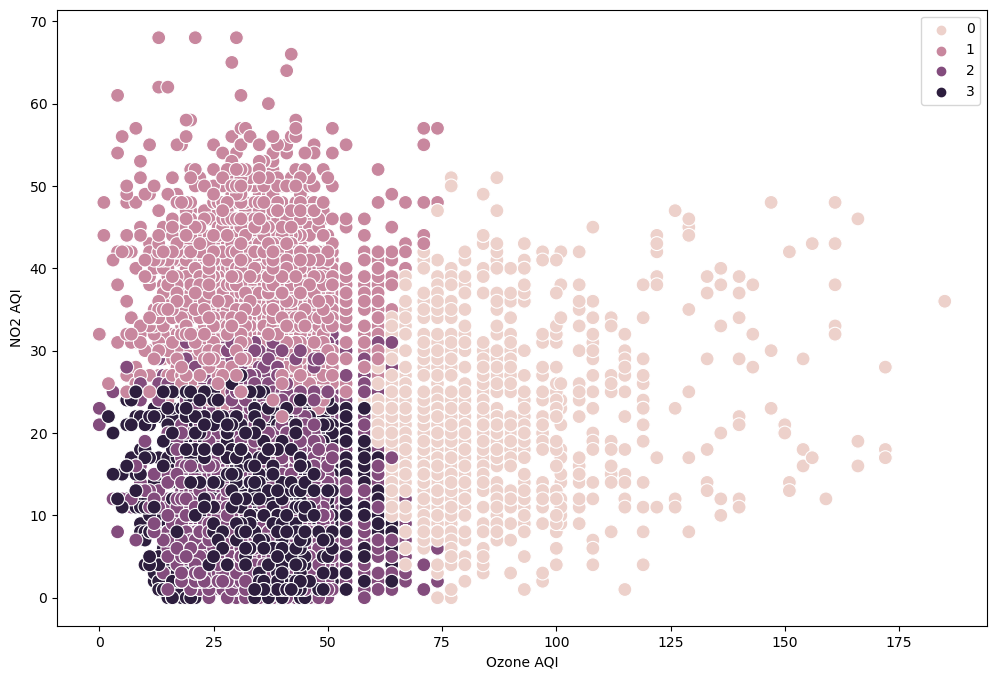

In [39]:
# Plot the clusters for the "AQI Ozone" and "AQI NO2" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['AQI Ozone'], y=df_sub['AQI NO2'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Ozone AQI') # Label x-axis.
plt.ylabel('NO2 AQI') # Label y-axis.
plt.show()

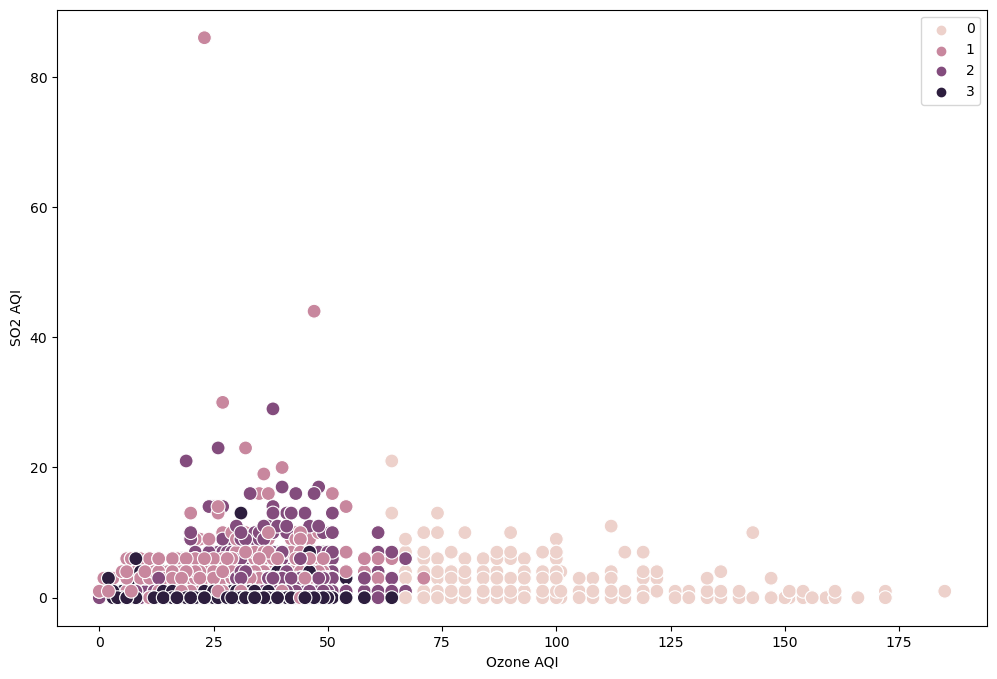

In [40]:
# Plot the clusters for the "AQI Ozone" and "AQI SO2" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['AQI Ozone'], y=df_sub['AQI SO2'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Ozone AQI') # Label x-axis.
plt.ylabel('SO2 AQI') # Label y-axis.
plt.show()

#### Discussion

The clusters are more evident in some plots than others, and it looks like the dark purple cluster behaves the sot consistently. This dark purple cluster seems to represent the higher Ozone Mean and AQI values. One hypthesis we have been testing is that as Ozone values increase, NO2 values decrease. From the first chart we can see that the dark purple cluster does not extend above an NO2 Mean value of about 30, so these higehr Ozone levels do correspond with lower NO2 levels. The other gasses do not appear to have strong relationships with Ozone levels, and the clusters tend to overlap a lot in these charts.

In [41]:
df_sub.loc[df_sub['clusters'] == 2, 'cluster'] = 'purple'
df_sub.loc[df_sub['clusters'] == 1, 'cluster'] = 'dark pink'
df_sub.loc[df_sub['clusters'] == 0, 'cluster'] = 'pink'
df_sub.loc[df_sub['clusters'] == 3, 'cluster'] = 'dark purple'

In [42]:
df_sub.groupby('cluster').agg({'Arithmetic Mean Ozone':['mean', 'median'], 
                         'AQI Ozone':['mean', 'median'], 
                         'Arithmetic Mean CO':['mean', 'median'],
                         'AQI CO':['mean', 'median'],
                         'Arithmetic Mean NO2':['mean', 'median'],
                         'AQI NO2':['mean', 'median'],
                         'Arithmetic Mean SO2':['mean', 'median'],
                         'AQI SO2':['mean', 'median']})

Arithmetic Mean Ozone            AQI Ozone         \
                             mean    median       mean median   
cluster                                                         
dark pink                0.025900  0.025935  35.938342   36.0   
dark purple              0.031192  0.031882  35.682308   36.0   
pink                     0.048291  0.048529  87.239903   80.0   
purple                   0.032493  0.032471  37.286629   37.0   

            Arithmetic Mean CO              AQI CO        Arithmetic Mean NO2  \
                          mean    median      mean median                mean   
cluster                                                                         
dark pink             0.358036  0.316667  6.305292    6.0           18.175855   
dark purple           0.186434  0.188889  2.659269    2.0            5.089568   
pink                  0.217910  0.212500  3.397415    3.0           10.053332   
purple                0.208293  0.200000  2.860882    2.0            5.878694   

                          AQI NO2        Arithmetic Mean SO2            \
                median       mean median                mean    median   
cluster                                                                  
dark pink    16.813457  35.082876   35.0            0.550856  0.408333   
dark purple   4.541667  11.222786   10.0            0.419801  0.295455   
pink          9.010416  21.618740   21.0            0.531245  0.445833   
purple        5.104258  12.254623   11.0            0.303360  0.217391   

              AQI SO2         
                 mean median  
cluster                       
dark pink    1.238143    1.0  
dark purple  0.454238    0.0  
pink         0.867528    0.0  
purple       0.490327    0.0

#### Discussion

What I find most interesting in these calculations is that the cluster with the lowest Ozone mean (pink) corresponds to the highest mean values for all other gases, however, the cluster with the highest Ozone mean (dark purple) corresponds to varrying mid-range mean values for the other gases. For future analysis, I would be interested in continuing to invesitgate how these different gas levels impact each other. It seems like Ozone behaves independently from the other gases, but CO, NO2, and SO2 have stronger relationships to eachother.

### 05. Exporting data

In [43]:
# export data with cluster information to csv

df_sub.to_csv(os.path.join(path,'02 Data','Prepared Data','Air Quality with Clusters.csv'))